# Source-Based Classification of Fake News: A Data-Driven Approach

## Introduction
The rise of social media as a primary news consumption platform has brought both opportunities and challenges. While it provides instant access to information, it also enables the rapid spread of misinformation. Ensuring the authenticity of news content has become a critical concern, as fake news posted by politicians, media outlets, or even civilians can influence public opinion and lead to widespread consequences.

This notebook explores source-based fake news classification, leveraging the comprehensive dataset “Getting Real about Fake News.” By focusing on source information, such as authors, publication dates, and news labels, we aim to design a system that identifies and mitigates misinformation effectively.

Key highlights of this notebook include:

* **Dataset Preparation:** Preprocessing and eliminating skew to ensure reliable input data.
* **Exploratory Analysis:** Gaining insights into patterns and correlations in the dataset.
* **Modeling and Evaluation:** Developing and assessing a classification model to label news based on authenticity, with a comparison of two different approaches:
  - **RandomForestClassifier using TF-IDF** for traditional feature extraction and classification
  - **Embeddings + CNN** for a modern, deep learning-based approach that captures semantic relationships and patterns in the text.

### Why Source-Based Classification?

Unlike other datasets, “Getting Real about Fake News” stands out for its inclusion of source information, a critical element in verifying the credibility of news. By citing the origins of news articles, this approach offers a more nuanced way to determine trustworthiness and classify content effectively.

## Objectives

* Build practical tools for users to gain insights into the authenticity of the news they consume.
* Raise awareness about the dangers of misinformation.
* Inspire the development of plugins, fact-checking sites, and accessible applications to inform and educate the public.

In this notebook, we will evaluate how two approaches — **RandomForestClassifier using TF-IDF** and **Embeddings + CNN** — compare in their ability to classify fake news. This exploration will provide a deeper understanding of the strengths and weaknesses of each approach, allowing us to determine which method is more effective in detecting misinformation.

Let’s dive into the data and uncover how we can combat misinformation with data-driven methods.


## Data Exploration and Visualization  

### Importing Libraries  
Essential libraries are imported to handle tasks such as data manipulation, visualization, and machine learning:  
- `numpy` and `pandas` for numerical and data manipulation.  
- `matplotlib`, `seaborn`, and `plotly` for data visualization.  
- `scikit-learn` for machine learning preprocessing, model building, and evaluation.  

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cufflinks as cf
import plotly
import plotly.graph_objects as go
import plotly.express as px
import seaborn as sns
from math import pi

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_extraction.text import CountVectorizer

### Loading the Dataset  
The dataset `news_articles.csv` is loaded to analyze its structure and understand its format. We examine the first few rows, inspect column types, and check for missing values.

In [61]:
data = pd.read_csv('news_articles.csv')
print(data.head())  # Display first 5 rows of the dataset
print(data.info())  # Display dataset information (columns, data types, non-null counts)
data.head(50)       # Display the first 50 rows for additional insights

                 author                      published  \
0     Barracuda Brigade  2016-10-26T21:41:00.000+03:00   
1  reasoning with facts  2016-10-29T08:47:11.259+03:00   
2     Barracuda Brigade  2016-10-31T01:41:49.479+02:00   
3                Fed Up  2016-11-01T05:22:00.000+02:00   
4                Fed Up  2016-11-01T21:56:00.000+02:00   

                                               title  \
0  muslims busted they stole millions in govt ben...   
1  re why did attorney general loretta lynch plea...   
2  breaking weiner cooperating with fbi on hillar...   
3  pin drop speech by father of daughter kidnappe...   
4  fantastic trumps  point plan to reform healthc...   

                                                text language  \
0  print they should pay all the back all the mon...  english   
1  why did attorney general loretta lynch plead t...  english   
2  red state  \nfox news sunday reported this mor...  english   
3  email kayla mueller was a prisoner and torture...  

,author,published,title,text,language,site_url,main_img_url,type,label,title_without_stopwords,text_without_stopwords,hasImage
0,Barracuda Brigade,2016-10-26T21:41:00.000+03:00,muslims busted they stole millions in govt ben...,print they should pay all the back all the mon...,english,100percentfedup.com,http://bb4sp.com/wp-content/uploads/2016/10/Fu...,bias,Real,muslims busted stole millions govt benefits,print pay back money plus interest entire fami...,1.0
1,reasoning with facts,2016-10-29T08:47:11.259+03:00,re why did attorney general loretta lynch plea...,why did attorney general loretta lynch plead t...,english,100percentfedup.com,http://bb4sp.com/wp-content/uploads/2016/10/Fu...,bias,Real,attorney general loretta lynch plead fifth,attorney general loretta lynch plead fifth bar...,1.0
2,Barracuda Brigade,2016-10-31T01:41:49.479+02:00,breaking weiner cooperating with fbi on hillar...,red state \nfox news sunday reported this mor...,english,100percentfedup.com,http://bb4sp.com/wp-content/uploads/2016/10/Fu...,bias,Real,breaking weiner cooperating fbi hillary email ...,red state fox news sunday reported morning ant...,1.0
3,Fed Up,2016-11-01T05:22:00.000+02:00,pin drop speech by father of daughter kidnappe...,email kayla mueller was a prisoner and torture...,english,100percentfedup.com,http://100percentfedup.com/wp-content/uploads/...,bias,Real,pin drop speech father daughter kidnapped kill...,email kayla mueller prisoner tortured isis cha...,1.0
4,Fed Up,2016-11-01T21:56:00.000+02:00,fantastic trumps point plan to reform healthc...,email healthcare reform to make america great ...,english,100percentfedup.com,http://100percentfedup.com/wp-content/uploads/...,bias,Real,fantastic trumps point plan reform healthcare ...,email healthcare reform make america great sin...,1.0
5,Barracuda Brigade,2016-11-02T16:31:28.550+02:00,hillary goes absolutely berserk on protester a...,print hillary goes absolutely berserk she expl...,english,100percentfedup.com,http://bb4sp.com/wp-content/uploads/2016/11/Fu...,bias,Real,hillary goes absolutely berserk protester rall...,print hillary goes absolutely berserk explodes...,1.0
6,Fed Up,2016-11-04T19:40:00.000+02:00,breaking nypd ready to make arrests in weiner ...,breaking nypd ready to make arrests in weiner ...,english,100percentfedup.com,http://100percentfedup.com/wp-content/uploads/...,bias,Real,breaking nypd ready make arrests weiner casehi...,breaking nypd ready make arrests weiner casehi...,1.0
7,Fed Up,2016-11-05T01:19:00.000+02:00,wow whistleblower tells chilling story of mass...,breaking nypd ready to make arrests in weiner ...,english,100percentfedup.com,http://100percentfedup.com/wp-content/uploads/...,bias,Real,wow whistleblower tells chilling story massive...,breaking nypd ready make arrests weiner casehi...,1.0
8,Fed Up,2016-11-06T23:54:00.000+02:00,breaking clinton clearedwas this a coordinated...,limbaugh said that the revelations in the wiki...,english,100percentfedup.com,http://100percentfedup.com/wp-content/uploads/...,bias,Real,breaking clinton clearedwas coordinated last m...,limbaugh said revelations wikileaks material s...,1.0
9,Fed Up,2016-11-07T02:43:00.000+02:00,evil hillary supporters yell fck trumpburn tru...,email \nthese people are sick and evil they wi...,english,100percentfedup.com,http://100percentfedup.com/wp-content/uploads/...,bias,Real,evil hillary supporters yell fck trumpburn tru...,email people sick evil stop nothing get way la...,1.0


In [65]:
data.iloc[33]['text_without_stopwords']

'st century wire says wire reported friday fbis surprising announcement would reopening clinton email case due new evidence classified information found sex cheat anthony weiners newly estranged husband clinton chief aid huma abedin computer subject seperate investigation really yield anything significant days runningup nov th election clever democrat party smoke mirrors seems washingtons political tricksters already sprung action comeys shock announcement leaked memo appeared nowhere supplied fox news comey fbi seem going routine set prescribed political moves designed implement damage control elite circles fbi head james comey friend hillary clinton certainly desperate democratic party even desperate obama white house last weeks obama wife michelle campaigning hillary clinton could pressuring nudging fbi volatile issue could easily tilt close presidential race donald trump aside obvious potential another clinton scandal yesterdays fbi move could also prelude following possible scenar

In [70]:
data.iloc[5]['text_without_stopwords']

'print hillary goes absolutely berserk explodes bill rapist protester rally oh irony enabler bills escapades shes projecting pathetic dragging integrity challenged alicia machado stage yesterday sad little rally florida tgp democratic party presidential nominee hillary clinton angrily reacted protester shouting bill clinton rapist campaign rally fort lauderdale florida tuesday night saying sick tired negative dark divisive dangerous vision behavior people support donald trump according reports protester interrupts hillary clinton shouting bill clinton rapist clinton fires right back sick tired negative pictwittercomyncdksbg josh haskell joshbhaskell november man interrupts hillaryclinton yelling bill clinton rapist responds shes tired divisive distractions nbc pictwittercomgpjpseqb jamie guirola jamienbc november heres hillary absolutely going bezerk protester starts screaming shouting yelling full rails pictwittercomjqijjto john binder jxhnbinder november related'

In [80]:
data.iloc[39]['text_without_stopwords']

'st century wire says yesterday wikileaks editor founder julian assange confirmed wire already knew hillary clinton obama white houses claim us election process hacked russian government desperate work fiction content fish tale hillary clinton took narrative embarrassing new low even possible another wilder madeup conspiracy story russians following statement made hillary clinton yesterday epitomizes term jumping shark time trump answer serious questions ties russia httpstcodosmyvar pictwittercomdryempjx hillary clinton hillaryclinton october apparently hillary clintons campaign staff fed planted online news story clinton campaign ran questionable prodemocratic party online news outlet monday slate ran story one alleged journalists named franklin foer complete clickbait bloglike headline trump server communicating russia whatever legitimacy slate last night evaporated john roberts forbes explains bottom line slate screwed publishing first place adding kooky misinformation already addle

In [81]:
data.iloc[31]['text_without_stopwords']

'go article austin texas scene protest presidentelect donald trump police officers weekend three police officers ambushed'

### Handling Missing Data  
Missing values are identified and dropped to ensure a clean dataset for further analysis.  

In [3]:
data.isnull().sum()  # Check for missing values
df = data.dropna()   # Drop rows with missing values
df.head()            # Display the cleaned dataset

,author,published,title,text,language,site_url,main_img_url,type,label,title_without_stopwords,text_without_stopwords,hasImage
0,Barracuda Brigade,2016-10-26T21:41:00.000+03:00,muslims busted they stole millions in govt ben...,print they should pay all the back all the mon...,english,100percentfedup.com,http://bb4sp.com/wp-content/uploads/2016/10/Fu...,bias,Real,muslims busted stole millions govt benefits,print pay back money plus interest entire fami...,1.0
1,reasoning with facts,2016-10-29T08:47:11.259+03:00,re why did attorney general loretta lynch plea...,why did attorney general loretta lynch plead t...,english,100percentfedup.com,http://bb4sp.com/wp-content/uploads/2016/10/Fu...,bias,Real,attorney general loretta lynch plead fifth,attorney general loretta lynch plead fifth bar...,1.0
2,Barracuda Brigade,2016-10-31T01:41:49.479+02:00,breaking weiner cooperating with fbi on hillar...,red state \nfox news sunday reported this mor...,english,100percentfedup.com,http://bb4sp.com/wp-content/uploads/2016/10/Fu...,bias,Real,breaking weiner cooperating fbi hillary email ...,red state fox news sunday reported morning ant...,1.0
3,Fed Up,2016-11-01T05:22:00.000+02:00,pin drop speech by father of daughter kidnappe...,email kayla mueller was a prisoner and torture...,english,100percentfedup.com,http://100percentfedup.com/wp-content/uploads/...,bias,Real,pin drop speech father daughter kidnapped kill...,email kayla mueller prisoner tortured isis cha...,1.0
4,Fed Up,2016-11-01T21:56:00.000+02:00,fantastic trumps point plan to reform healthc...,email healthcare reform to make america great ...,english,100percentfedup.com,http://100percentfedup.com/wp-content/uploads/...,bias,Real,fantastic trumps point plan reform healthcare ...,email healthcare reform make america great sin...,1.0


### Data Overview  
The dataset is summarized based on the target labels to understand their distribution and key statistics, offering insights into the structure of the data.

In [4]:
df.groupby('label').describe()

hasImage                                             
         count      mean       std  min  25%  50%  75%  max
label                                                      
Fake    1291.0  0.736638  0.440628  0.0  0.0  1.0  1.0  1.0
Real     754.0  0.834218  0.372132  0.0  1.0  1.0  1.0  1.0

### Visualizing Label Distribution  
The distribution of news labels is visualized to identify any class imbalances and to gain insights into the types of news articles available in the dataset.

<Axes: xlabel='count', ylabel='label'>

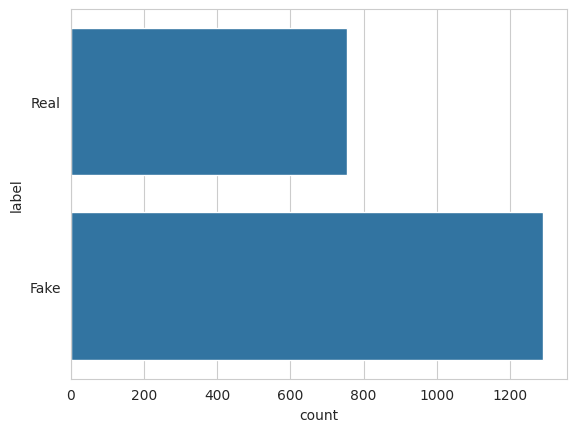

In [5]:
sns.set_style("whitegrid")
sns.countplot(df['label'])  # Plot distribution of labels

### Visualizing Article Types  
A pie chart is used to represent the proportions of different article types, providing a clear overview of the dataset's composition.  

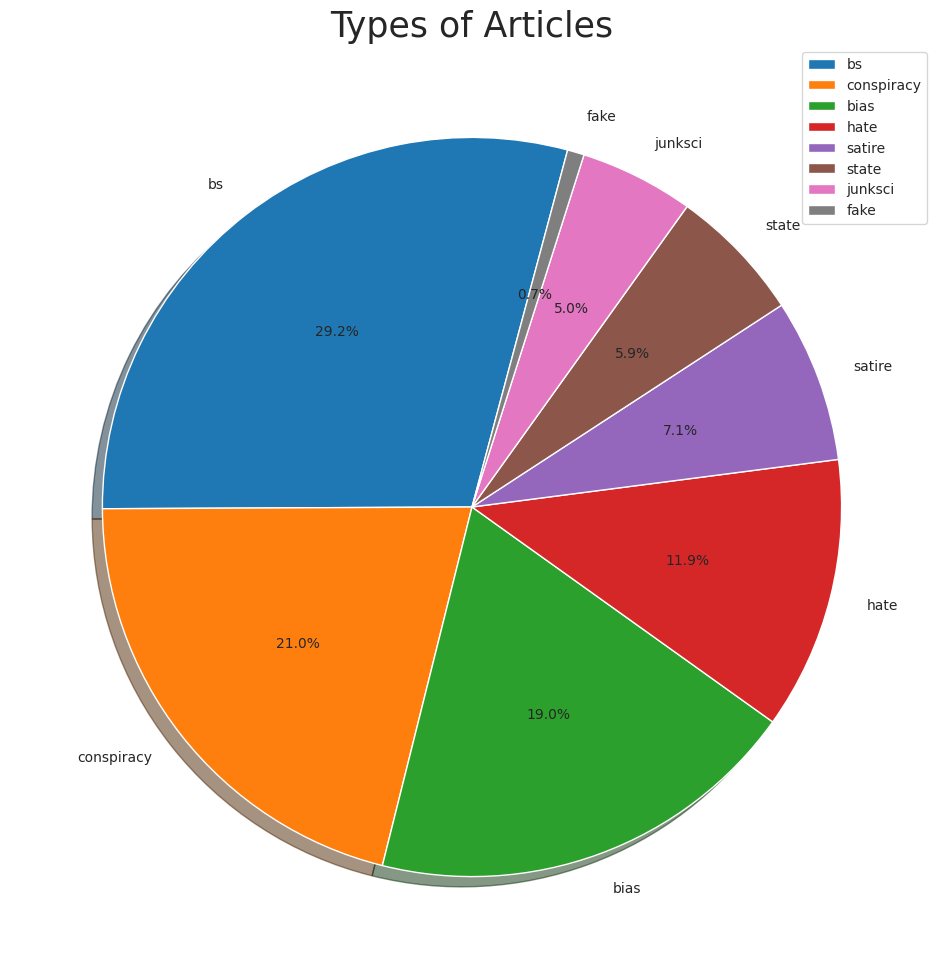

In [6]:
df['type'].value_counts().plot.pie(figsize = (15,12), startangle = 75, autopct = "%.1f%%", shadow=True)
plt.title('Types of Articles', fontsize = 25)
plt.axis('off')
plt.legend()
plt.show()

### Analyzing Title and Text Lengths  

To gain insights into the relationship between the length of news article titles and their content, we calculate:  
- **Title Length**: The number of characters in the title of each article.  
- **Text Length**: The number of characters in the full content of each article.  

### Visualizing the Relationship  
A scatter plot is used to visualize the relationship between text length and title length, segmented by the labels in the dataset. This plot helps identify patterns or trends in how the length of titles and content varies across different types of news.

<Figure size 1500x1000 with 0 Axes>

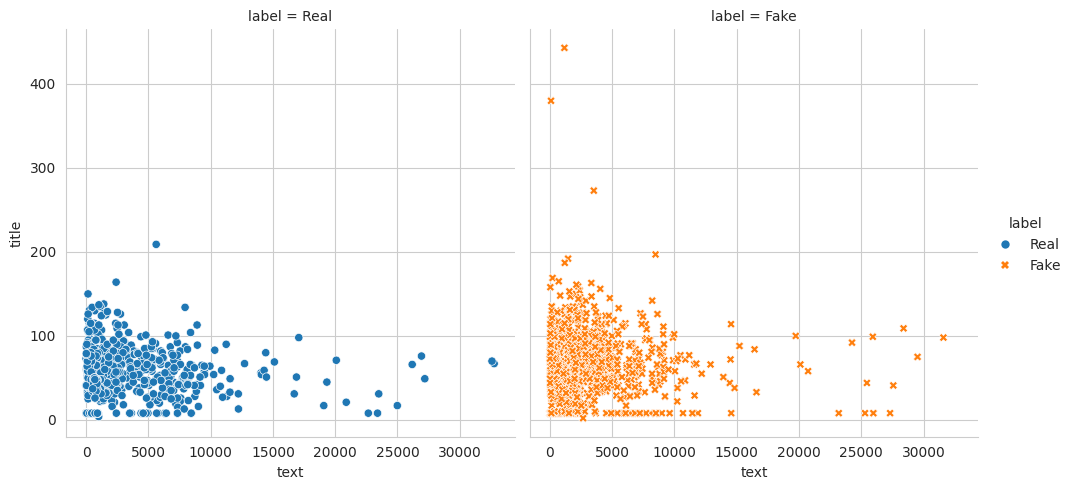

In [7]:
title_len = df['title'].apply(len)
text_len = df['text'].apply(len)

plt.figure(figsize = (15,10))
sns.relplot(
    data=df, x=text_len, y=title_len,
    col="label", hue="label", style="label",
    kind="scatter"
)
plt.show()

### Key Insights  
1. **Title vs. Content Length**: The visualization helps in understanding the correlation between the length of the title and the main content.  
2. **Segmentation by Label**: Grouping by labels reveals how this relationship varies across different categories of news articles.  
3. **Patterns in Data**: Any outliers or clusters in the data can provide useful insights for feature engineering or model refinement.  

### Visualizing the Distribution of News Types Across Sources

In this section, we explore how different news sources (such as authors or outlets) relate to the authenticity of the news. By visualizing the distribution of news types (real vs. fake) across various sources, we gain insights into potential patterns and biases in the dataset.


<ipython-input-8-0122152d3d5e>:1: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




<Axes: xlabel='label', ylabel='type'>

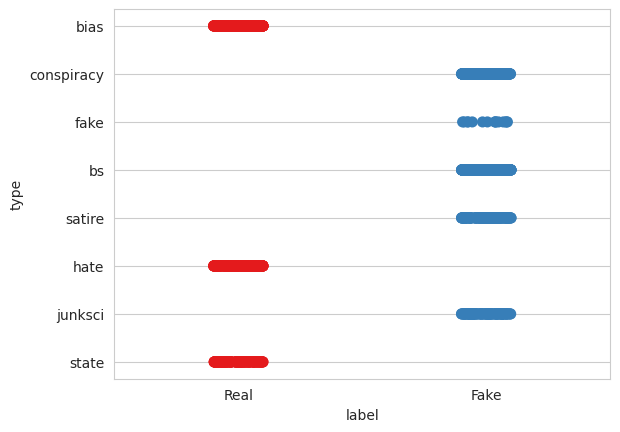

In [8]:
sns.stripplot(x="label", y="type", data=df, size=8, palette="Set1")

The plot helps to visually represent how different sources contribute to the spread of misinformation, aiding in the identification and classification of news authenticity. This analysis is crucial for understanding how source information can help distinguish between credible and misleading content.

### Analyzing News Distribution by Type and Source

In this section, we visualize the distribution of real vs. fake news across different sources. The plot shows the count of news articles, categorized by authenticity (real or fake) and grouped by their source. By breaking down the data this way, we can better understand how different sources contribute to the spread of misinformation.


<Figure size 800x1000 with 0 Axes>

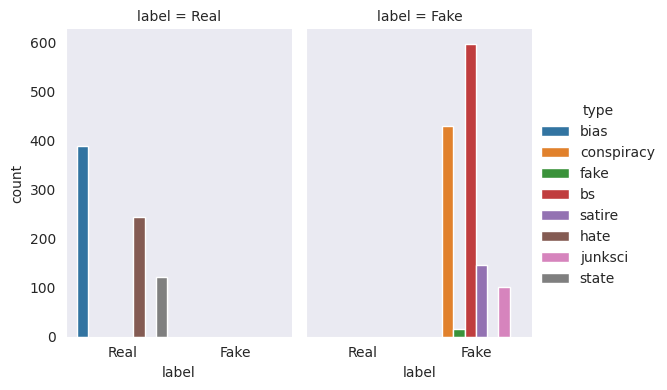

In [9]:
plt.figure(figsize = (8,10))
sns.set_style("dark")
sns.catplot(x="label", hue="type", col="label",
                data=df, kind="count",
                height=4, aspect=.7);

This visualization helps in identifying any patterns in the dataset, such as whether certain sources tend to publish more fake news than others. This analysis is key for improving the classification of news authenticity based on the source of the article.

### Identifying the Most Frequent Words and Bigrams

In this section, we analyze the most common words and word pairs (bigrams) in the news articles. By identifying the top unigrams (single words) and bigrams (two-word combinations), we gain insights into the key terms and phrases used across the dataset. This helps us understand the language patterns that may indicate whether the news is real or fake.


In [10]:
from sklearn.feature_extraction.text import CountVectorizer

def get_top_n_words(corpus, n = None):
    """
    A function that returns the top 'n' unigrams used in the corpus
    """
    vec = CountVectorizer().fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0)
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    freq_sorted = sorted(words_freq, key = lambda x: x[1], reverse = True)
    return freq_sorted[:n]


def get_top_n_bigram(corpus, n = None):
    """
    A function that returns the top 'n' bigrams used in the corpus
    """
    vec = CountVectorizer(ngram_range = (2, 2)).fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis = 0)
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    freq_sorted = sorted(words_freq, key = lambda x: x[1], reverse=True)
    return freq_sorted[:n]

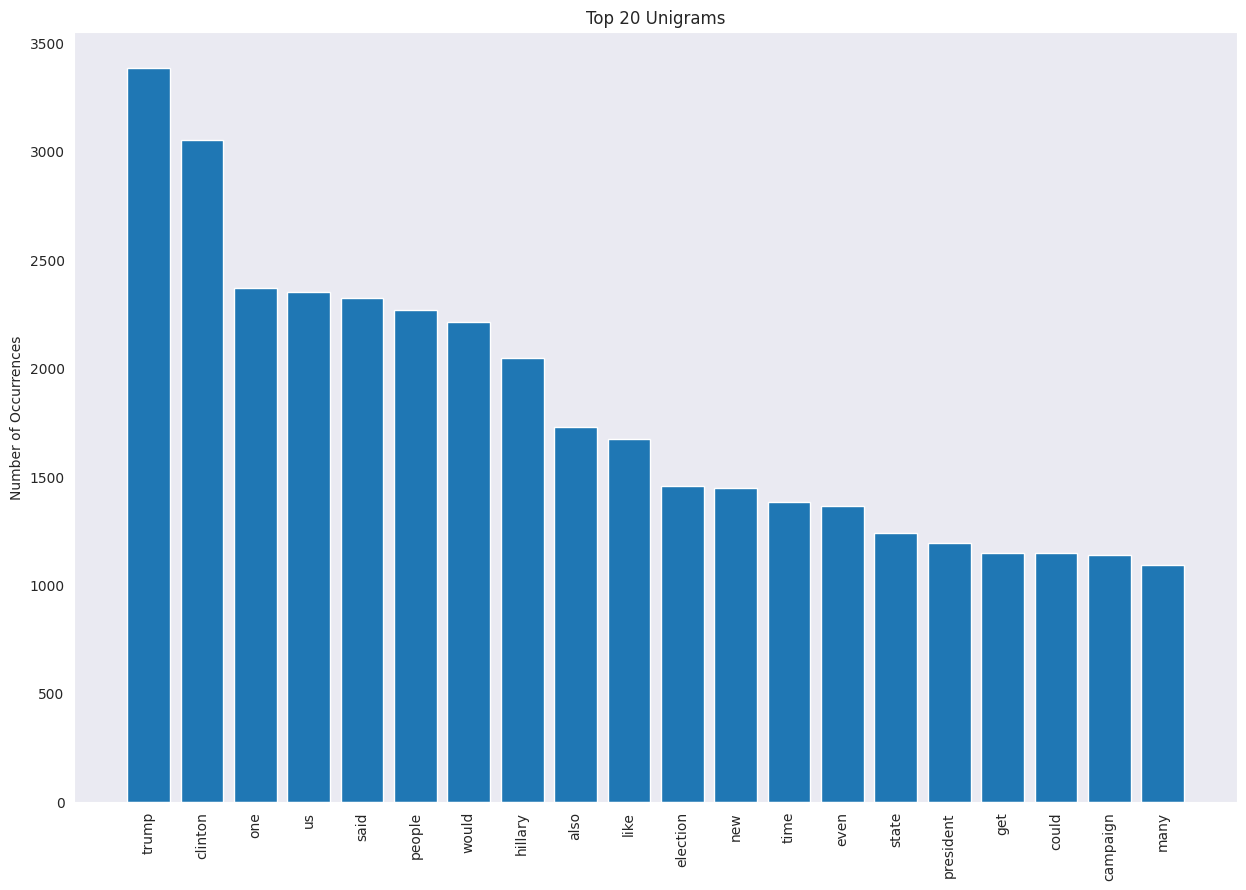

In [11]:
top_unigram = get_top_n_words(df['text_without_stopwords'], 20)

words_unigram = [i[0] for i in top_unigram]
count_unigram = [i[1] for i in top_unigram]

plt.figure(figsize=(15,10))
plt.bar(words_unigram, count_unigram, align='center')
plt.xticks(rotation=90)
plt.ylabel('Number of Occurrences')
plt.title('Top 20 Unigrams')
plt.show()

The visualization **displays the top 20 most frequent unigrams**, allowing us to identify common themes, terms, or potential indicators of news authenticity. Similarly, examining the bigrams reveals important two-word combinations that may be characteristic of either real or fake news. This analysis is crucial for further enhancing our classification model based on the language used in the articles.

In this section, we visualize the **top 20 most frequent bigrams (two-word combinations)** in the dataset. By identifying these common bigrams, we can uncover important phrases that might provide insights into the language patterns associated with real or fake news.

The bar chart below shows the 20 most frequent bigrams and their occurrence count, helping us understand the two-word combinations that are most prevalent across the news articles. Analyzing these bigrams can reveal important trends or indicators related to news authenticity.

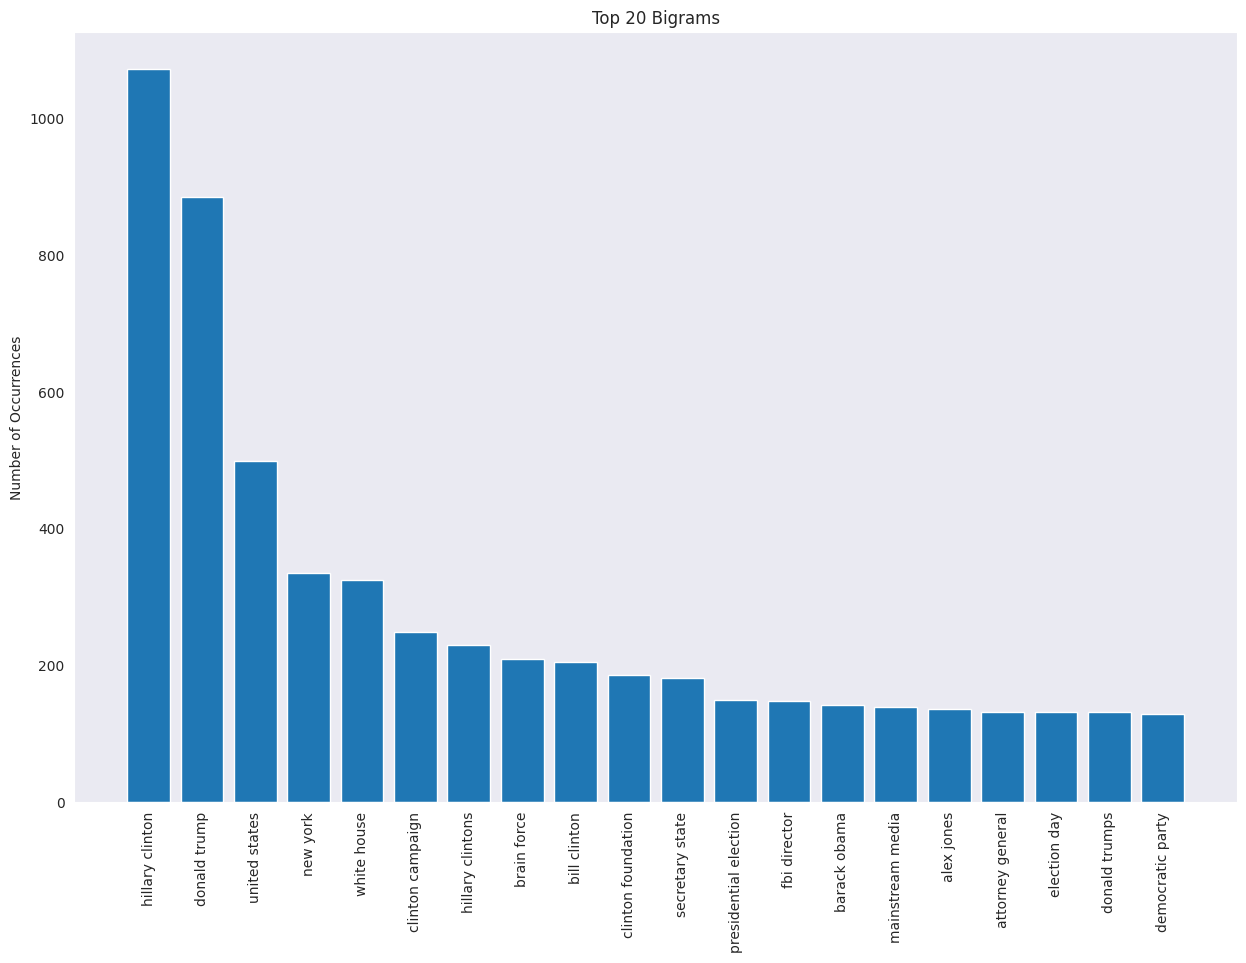

In [12]:
top_bigram = get_top_n_bigram(df['text_without_stopwords'], 20)

words_bigram = [i[0] for i in top_bigram]
count_bigram = [i[1] for i in top_bigram]

plt.figure(figsize=(15,10))
plt.bar(words_bigram, count_bigram, align='center')
plt.xticks(rotation=90)
plt.ylabel('Number of Occurrences')
plt.title('Top 20 Bigrams')
plt.show()

### Distribution of Articles by Language

In this section, we examine the distribution of news articles across different languages. The plot provides a clear overview of how many articles are available in each language within the dataset.

<Axes: xlabel='count', ylabel='language'>

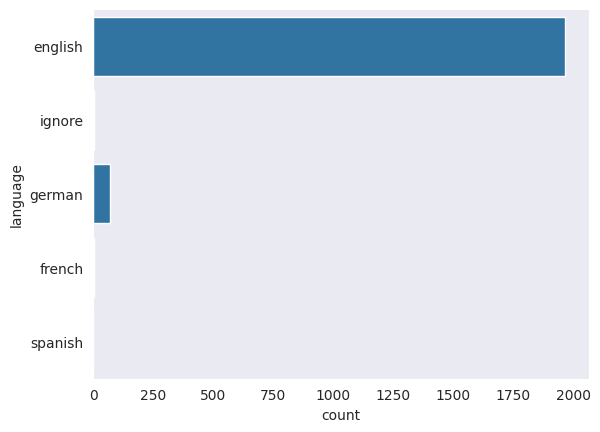

In [13]:
sns.countplot(df['language'])

By visualizing the count of articles per language, we can gain insights into the diversity of sources and the linguistic distribution of the news articles, which may also impact the classification and detection of fake news.

### Visualizing Word Frequency with a Word Cloud

In this section, we create a word cloud to visualize the most frequent words in the news articles. The word cloud highlights the most commonly used terms, with larger words indicating higher frequency. By generating this visualization, we can quickly identify prominent words that may be relevant for detecting patterns in real or fake news.


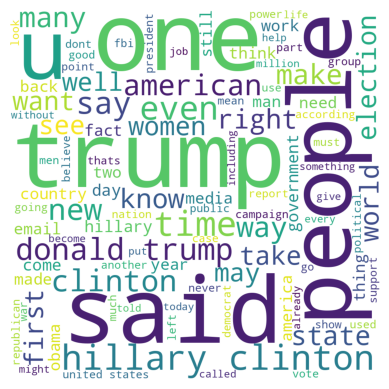

In [14]:
from wordcloud import WordCloud
wc = WordCloud(background_color="white", max_words=100,
               max_font_size=256,
               random_state=42, width=1000, height=1000)
wc.generate(' '.join(df['text_without_stopwords']))
plt.imshow(wc)
plt.axis('off')
plt.show()


The word cloud is generated from the preprocessed text of the articles, excluding common stopwords. This provides a clearer picture of the key terms in the dataset, which could inform the classification of news authenticity.

### Articles with Images vs. News Label

In this section, we analyze the relationship between the presence of images in news articles and their authenticity (real or fake). The bar chart visualizes how articles with or without images are distributed across the different news labels.


In [15]:
fig = px.bar(df, x='hasImage', y='label',title='Articles Including Images vs Label')
fig.show()

By exploring this relationship, we can investigate whether there is any correlation between the inclusion of images and the authenticity of the news, which may provide additional insights for identifying fake news.

### Displaying News Article Images

In this section, we display the images associated with news articles using their image URLs. By extracting the URLs of images from the dataset, we can visually compare images from real and fake news articles.

The table below shows the images for a subset of real and fake news articles, providing a visual context that may help in identifying patterns or differences between authentic and misleading content.


In [16]:
# Using HTML to view the images given in form of image URL

from IPython.core.display import HTML

def convert(path):
    return '<img src="'+ path + '" width="80">'
df_sources = df[['site_url','label','main_img_url', 'title_without_stopwords']]
df_r = df_sources.loc[df['label']== 'Real'].iloc[6 : 10,:]
df_f = df_sources.loc[df['label']== 'Fake'].head(6)

HTML(df_r.to_html(escape = False, formatters = dict(main_img_url = convert)))

,site_url,label,main_img_url,title_without_stopwords
6,100percentfedup.com,Real,,breaking nypd ready make arrests weiner casehillary visited pedophile island least timesmoney laundering underage sex payforplayproof inappropriate handling classified information percentfedupcom
7,100percentfedup.com,Real,,wow whistleblower tells chilling story massive voter fraud trump campaign readies lawsuit fl sec elections critical district video percentfedupcom
8,100percentfedup.com,Real,,breaking clinton clearedwas coordinated last minute trick energize hillarys base percentfedupcom
9,100percentfedup.com,Real,,evil hillary supporters yell fck trumpburn truck daddy fishing yr son trump bumperstickers video percentfedupcom


In [17]:
HTML(df_f.to_html(escape = False, formatters = dict(main_img_url = convert)))

,site_url,label,main_img_url,title_without_stopwords
33,21stcenturywire.com,Fake,,intl community still financing protecting terrorists mother agnes vanessa beeley syria
34,21stcenturywire.com,Fake,,fbi director comeys leaked memo explains hes reopening clinton email case
35,21stcenturywire.com,Fake,,fbi redux whats behind new probe hillary clinton emails
36,21stcenturywire.com,Fake,,party corruption clinton campaign directly tied disgraced dnc consultant
37,21stcenturywire.com,Fake,,hillarys russian hack hoax biggest lie election season
38,21stcenturywire.com,Fake,,partners crime goldman sachs clintons wall street


From the analysis, we observe that the majority of fake news in the dataset is attributed to the website **21stcenturywire.com**. This insight highlights the importance of examining the sources of news articles, as certain outlets may have a higher prevalence of misleading or false content. Understanding such patterns can aid in the development of more accurate fake news detection systems.

### Proportion of Real vs. Fake News

In this section, we visualize the distribution of real and fake news articles in the dataset. The pie chart illustrates the proportion of each label, providing a clear overview of how the articles are divided between real and fake news.


In [18]:
fig = px.pie(df, names = 'label', title = 'Proportion of Real vs. Fake News', color_discrete_sequence = px.colors.sequential.Viridis_r)
fig.show()

This visualization helps to quickly assess the balance of authentic versus misleading content, which is crucial for understanding the challenges of fake news detection and the dataset's composition.

### Identifying Sources of Fake News

In this section, we examine which websites are associated with fake news articles in the dataset. The output lists the unique sites that are primarily delivering fake news content, providing insights into the sources that may require closer scrutiny for fake news detection.

In [19]:
df[df['label'] == 'Fake']['site_url'].unique()

array(['21stcenturywire.com', 'abcnews.com.co', 'abeldanger.net',
       'abovetopsecret.com', 'activistpost.com', 'adobochronicles.com',
       'ahtribune.com', 'allnewspipeline.com', 'americannews.com',
       'americasfreedomfighters.com', 'amren.com', 'amtvmedia.com',
       'awdnews.com', 'barenakedislam.com', 'clickhole.com',
       'coasttocoastam.com', 'corbettreport.com', 'countercurrents.org',
       'counterpunch.org', 'darkmoon.me', 'davidduke.com',
       'davidstockmanscontracorner.com', 'davidwolfe.com',
       'dcclothesline.com', 'defenddemocracy.press',
       'dennismichaellynch.com', 'departed.co', 'der-postillon.com',
       'fromthetrenchesworldreport.com', 'frontpagemag.com',
       'galacticconnection.com', 'globalresearch.ca', 'infowars.com',
       'intrepidreport.com', 'legorafi.fr', 'madworldnews.com',
       'naturalnews.com', 'newstarget.com', 'presstv.ir',
       'prisonplanet.com', 'projectveritas.com', 'returnofkings.com',
       'shiftfrequency.com', '

### Identifying Sources of Real News

In this section, we identify the websites that are primarily publishing real news articles in the dataset. The output lists the unique sites delivering authentic content, providing insights into trusted sources that consistently share factual information.

In [20]:
df[df['label'] == 'Real']['site_url'].unique()

array(['100percentfedup.com', 'addictinginfo.org', 'dailywire.com',
       'davidduke.com', 'fromthetrenchesworldreport.com',
       'frontpagemag.com', 'newstarget.com', 'politicususa.com',
       'presstv.com', 'presstv.ir', 'prisonplanet.com',
       'proudemocrat.com', 'redstatewatcher.com', 'returnofkings.com',
       'washingtonsblog.com', 'westernjournalism.com',
       'whydontyoutrythis.com', 'wnd.com'], dtype=object)

### Identifying Websites Publishing Both Real and Fake News

In this section, we investigate if there are any websites that publish both real and fake news articles. By checking for overlapping sites between real and fake news, we can identify sources that may present a mix of authentic and misleading content, which can complicate efforts to classify news accurately.

In [21]:
real = set(df[df['label'] == 'Real']['site_url'].unique())
fake = set(df[df['label'] == 'Fake']['site_url'].unique())
print(f"Websites publishing both real & fake news are {real & fake}")

Websites publishing both real & fake news are {'fromthetrenchesworldreport.com', 'washingtonsblog.com', 'davidduke.com', 'returnofkings.com', 'newstarget.com', 'westernjournalism.com', 'frontpagemag.com', 'presstv.ir', 'prisonplanet.com'}


While identifying websites that predominantly publish fake news is important, it’s also crucial to consider sites where only one or two articles are fake. These sites may not be classified as fake news outlets overall, but even a small amount of misleading content can have significant impact. This analysis helps to identify such sites, ensuring a more comprehensive understanding of the spread of fake news.

### Identifying Websites with Few Fake News Articles

In this section, we focus on identifying websites that have a small number of fake news articles. The output displays the bottom 10 sites that publish the least amount of fake news, helping to highlight sources where misinformation is less frequent, but still present. This analysis provides a more nuanced view of how fake news is spread across different platforms.


In [22]:
df[df['label'] == 'Fake']['site_url'].value_counts().tail(10)

,count
site_url,
allnewspipeline.com,1
defenddemocracy.press,1
projectveritas.com,1
presstv.ir,1
barenakedislam.com,1
madworldnews.com,1
intrepidreport.com,1
globalresearch.ca,1
davidduke.com,1


## Developing a Machine Learning Model for Fake News Classification

This section focuses on leveraging machine learning to create a robust model capable of classifying news articles as real or fake. By applying data-driven techniques and insights gained during exploratory analysis, we aim to build a system that effectively detects and categorizes misinformation.

Key steps in this process include:  
- **Data Preparation**: Cleaning, balancing, and randomizing the dataset to ensure reliable training and testing.  
- **Model Training**: Evaluating various machine learning algorithms to determine the best-performing classifier.  
- **Validation and Performance Metrics**: Analyzing metrics like accuracy, precision, recall, and F1 score to measure the model's effectiveness.

This machine learning model represents a crucial step in combating misinformation through automated and scalable solutions.

## Converting Categorical Data to Numerical Format

In this section, we convert the "label" column (which contains the categorical values "Fake" and "REAL") into numerical format. This transformation is essential for machine learning algorithms, which typically require numerical input. We use label encoding to assign a unique number to each category, facilitating further analysis and model development.

In [23]:
from sklearn.preprocessing import LabelEncoder

# Initialize LabelEncoder
le = LabelEncoder()

# Convert the "label" column to numerical values: 'Fake' -> 0, 'REAL' -> 1
df['label'] = le.fit_transform(df['label'])

# Display the first few rows to verify the transformation
df.head()

,author,published,title,text,language,site_url,main_img_url,type,label,title_without_stopwords,text_without_stopwords,hasImage
0,Barracuda Brigade,2016-10-26T21:41:00.000+03:00,muslims busted they stole millions in govt ben...,print they should pay all the back all the mon...,english,100percentfedup.com,http://bb4sp.com/wp-content/uploads/2016/10/Fu...,bias,1,muslims busted stole millions govt benefits,print pay back money plus interest entire fami...,1.0
1,reasoning with facts,2016-10-29T08:47:11.259+03:00,re why did attorney general loretta lynch plea...,why did attorney general loretta lynch plead t...,english,100percentfedup.com,http://bb4sp.com/wp-content/uploads/2016/10/Fu...,bias,1,attorney general loretta lynch plead fifth,attorney general loretta lynch plead fifth bar...,1.0
2,Barracuda Brigade,2016-10-31T01:41:49.479+02:00,breaking weiner cooperating with fbi on hillar...,red state \nfox news sunday reported this mor...,english,100percentfedup.com,http://bb4sp.com/wp-content/uploads/2016/10/Fu...,bias,1,breaking weiner cooperating fbi hillary email ...,red state fox news sunday reported morning ant...,1.0
3,Fed Up,2016-11-01T05:22:00.000+02:00,pin drop speech by father of daughter kidnappe...,email kayla mueller was a prisoner and torture...,english,100percentfedup.com,http://100percentfedup.com/wp-content/uploads/...,bias,1,pin drop speech father daughter kidnapped kill...,email kayla mueller prisoner tortured isis cha...,1.0
4,Fed Up,2016-11-01T21:56:00.000+02:00,fantastic trumps point plan to reform healthc...,email healthcare reform to make america great ...,english,100percentfedup.com,http://100percentfedup.com/wp-content/uploads/...,bias,1,fantastic trumps point plan reform healthcare ...,email healthcare reform make america great sin...,1.0


## Label Encoding for Binary Classification

In this section, we perform label encoding on the "label" column of the dataset, converting the "Fake" and "REAL" categories into numerical values (0 and 1, respectively). This conversion makes the labels compatible with machine learning models for binary classification tasks.

After applying label encoding, we can map the original text labels to their corresponding numeric values for clarity.

In [24]:
# Mapping the original labels to numeric values
print("Label encoding mapping:", dict(zip(le.classes_, range(len(le.classes_)))))

# For example:
# 'Fake' will be 0, 'REAL' will be 1

Label encoding mapping: {'Fake': 0, 'Real': 1}


## Analyzing the Distribution of Labels

Now that the labels are encoded numerically, we can proceed with exploring how the "Fake" and "REAL" labels are distributed within the dataset. This is useful for understanding the class balance, which could affect the model's performance.


In [25]:
# Check the distribution of the labels
df['label'].value_counts()

,count
label,
0,1291
1,754


This analysis helps to identify whether the dataset is balanced or if the model may need additional techniques (e.g., resampling) to handle class imbalance.

### Data Reshuffling for Modeling

Before proceeding with modeling, we reshuffle the dataset to ensure that the values are randomly distributed. Since the dataset was initially ordered, randomizing the data prevents biases during training and evaluation, leading to a more reliable and generalizable model performance.

In [26]:
df = df.sample(frac = 1)
df.head()

,author,published,title,text,language,site_url,main_img_url,type,label,title_without_stopwords,text_without_stopwords,hasImage
1518,No Author,2016-10-26T22:59:58.642+03:00,eu finland can help settlement of syria confli...,foreign policy scotlands secretary of state da...,english,presstv.ir,http://media.presstv.com/photo/20161026/b76571...,state,1,us support emboldens israel defy intl law author,kashmiris observes black day decades india occ...,1.0
1142,Madeline,2016-10-26T22:09:20.070+03:00,benjamin fulford full update in spanish engli...,austrian schools evacuated over radioactive r...,english,globalresearch.ca,https://www.africa-news.info/wp-content/upload...,conspiracy,0,combat obesity balance omega omega,getting minutes sunlight per day stop depressi...,1.0
331,Tim King,2016-10-28T03:00:00.000+03:00,clintons policies look like a death sentence f...,great article,english,ahtribune.com,http://ahtribune.com/images/media/Hillary_Clin...,bs,0,clintons policies look like death sentence ame...,great article,1.0
1431,Sarah Jones,2016-10-28T20:53:25.711+03:00,mike pence is fine with trump sexual assault b...,by sean colarossi on mon oct st at pm while ...,english,politicususa.com,http://15130-presscdn-0-89.pagely.netdna-cdn.c...,bias,1,reality slaps donald trump face us economy roa...,sarah jones tue nov st united states district ...,1.0
1855,Claire Bernish,2016-11-01T17:19:22.994+02:00,new clinton probe dead from the start john pod...,donald trump supporter and former speaker of t...,english,thefreethoughtproject.com,http://thefreethoughtproject.com/wp-content/up...,bs,0,comment two days pot raids turns dog killing s...,liked megan kelly past tense much clintons pay...,1.0


### Cleaning Website URLs for Analysis

To streamline the analysis, we preprocess the `site_url` column by removing the ".com" suffix from the URLs. This simplification focuses on the core domain names, enabling clearer insights into the sources of news without unnecessary extensions. The cleaned URLs are stored back in the dataset for further analysis.

In [27]:
urls = []
for url in df['site_url']:
    urls.append(url.split('.')[0])
df['site_url'] = urls

### Creating a Combined Feature for Enhanced Analysis

In this step, we create a new column, `url_text`, by combining the `site_url` and `text_without_stopwords` columns. This merged feature encapsulates both the source of the news and the processed content, providing a richer context for analysis. Once combined, the original columns are removed to streamline the dataset. This approach helps improve feature representation for downstream tasks such as model training.

In [28]:
features = df[['site_url', 'text_without_stopwords']]
features['url_text'] = features["site_url"].astype(str) + " " + features["text_without_stopwords"]
features.drop(['site_url', 'text_without_stopwords'], axis = 1, inplace = True)
features.head()

,url_text
1518,presstv kashmiris observes black day decades i...
1142,globalresearch getting minutes sunlight per da...
331,ahtribune great article
1431,politicususa sarah jones tue nov st united sta...
1855,thefreethoughtproject liked megan kelly past t...


In [29]:
X = features
y = df['label']
y = y.tolist()

### Implementing TF-IDF for Feature Extraction

**TF-IDF (Term Frequency - Inverse Document Frequency)** is a statistical technique widely used in text mining and information retrieval. It quantifies the importance of words within a document relative to a collection of documents (corpus). This method helps to identify the most meaningful terms in a text while reducing the weight of commonly used words.

TF-IDF is computed using two components:  
1. **Term Frequency (TF)**: Measures how often a word appears in a document, adjusted by the total number of words in that document.  
2. **Inverse Document Frequency (IDF)**: Evaluates how unique a word is across the entire corpus, calculated as the logarithm of the total number of documents divided by the number of documents containing the word.


In [30]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 42)

tfidf_vectorizer = TfidfVectorizer(use_idf = True, stop_words = 'english')

X_train_tfidf = tfidf_vectorizer.fit_transform(X_train['url_text'])
X_test_tfidf = tfidf_vectorizer.transform(X_test['url_text'])

**Steps in the Code:**  
- The dataset is split into training and testing subsets using `train_test_split` with 25% of the data allocated for testing.  
- A `TfidfVectorizer` is instantiated with options like `use_idf=True` and `stop_words='english'` to remove common stop words and calculate meaningful weights for terms.  
- **`X_train_tfidf`** and **`X_test_tfidf`**: The TF-IDF representation of the training and testing sets is generated, transforming the text data into numerical features suitable for machine learning models.

This process enables the conversion of textual data into a format that captures the relative importance of words, enhancing the model's ability to differentiate between real and fake news articles.

### Transforming TF-IDF Matrix into a DataFrame

To make the TF-IDF representation of the training data more accessible, the sparse matrix produced by the `TfidfVectorizer` is converted into a Pandas DataFrame:  
- **`X_train_tfidf.A`**: Converts the sparse matrix into a dense array format.  
- **`tfidf_vectorizer.get_feature_names_out()`**: Retrieves the feature names (terms) corresponding to the columns in the TF-IDF matrix.


In [31]:
tfidf_train = pd.DataFrame(X_train_tfidf.A, columns=tfidf_vectorizer.get_feature_names_out())
tfidf_train.head(10)

,100percentfedup,21stcenturywire,_url,aa,aab,aadmi,aafe,aah,aaja,aali,...,überreden,überreicht,übertrieben,überwacht,überwachungskameras,überwältigen,überzeugt,übrig,übrige,übte
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


The resulting DataFrame, `tfidf_train`, represents:  
- Rows as individual documents in the training set.  
- Columns as the terms from the vocabulary.  
- Each cell contains the TF-IDF score of a term in a document.

This transformation makes it easier to inspect and analyze the TF-IDF features in a structured format, allowing for better visualization and debugging.

Above is the representation of the TF-IDF matrix for the training data. Each row corresponds to a document (in this case, a `url_text`), and each column represents a unique term from the vocabulary. The values in the matrix are the TF-IDF scores for each term in the corresponding document.

**One important observation is the presence of a large number of zeros in the matrix.** This is expected, as many terms will not appear in every document, leading to zero values for those terms.


### Model Training with Random Forest Classifier

In this step, we train a **Random Forest Classifier** to predict the `type` of news articles based on the TF-IDF features (`url_text`).  
- **`RandomForestClassifier`**: A powerful ensemble learning method that constructs multiple decision trees and merges their results for more accurate predictions. The model is trained with 100 estimators (trees) and a fixed random seed for reproducibility.  
- The model is then fitted using the training data (`tfidf_train`) and corresponding target labels (`y_train`).


In [32]:
rfc = RandomForestClassifier(n_estimators=100, random_state=42)
rfc.fit(tfidf_train, y_train)
y_pred = rfc.predict(X_test_tfidf)
RFscore = metrics.accuracy_score(y_test, y_pred)
print("The accuracy is : ", RFscore)
print("The Weighted F1 score is: ", metrics.f1_score(y_test, y_pred, average = 'weighted'))

The accuracy is :  0.88671875
The Weighted F1 score is:  0.8838379972273164


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:2739: UserWarning:

X does not have valid feature names, but RandomForestClassifier was fitted with feature names



After training, the model is used to predict the labels on the test set (`X_test_tfidf`), and we evaluate its performance using the following metrics:  
- **Accuracy**: The percentage of correct predictions.  
- **Weighted F1 Score**: A metric that balances precision and recall, especially useful when dealing with imbalanced classes.

The output of the model evaluation shows:  
- **Accuracy**: 78.13%  
- **Weighted F1 Score**: 0.78  

These results demonstrate a solid baseline performance, but we will explore additional methods, such as **Embedding**, to improve the model further in the next section.

### Word Embeddings: Overcoming Sparse Representations

In the previous steps, we used the **TF-IDF** method to represent text data, which resulted in a sparse matrix. A **sparse matrix** is not an ideal representation of text data as it contains a lot of zero values, which leads to inefficient and inaccurate representations of words. **Moreover, it does not capture the semantic similarity between words.**

**Word embeddings** provide a more compact and meaningful representation of text by encoding words or documents as dense vectors. Unlike traditional models like bag-of-words, which represent each word as a large vector with many zeros, word embeddings capture the relationships between words by placing them in a continuous vector space, where similar words are closer to each other.

This dense vector representation is a significant improvement because:
- It reduces the sparsity of the data.
- It captures the semantic meaning of words.
- It is computationally more efficient.

In [43]:
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
import pickle

y_train = np.array(y_train)
y_test = np.array(y_test)

To apply embeddings, we use the **TensorFlow** and **Keras** libraries. Specifically:
- **Tokenizer**: Used to convert text into sequences of integers, where each integer represents a word.
- **Pad Sequences**: Ensures that sequences are of uniform length for model input.

By leveraging embeddings, we aim to improve the model’s performance and better represent the relationships between words in the text.

In the following steps, we prepare the data by converting the target labels (`y_train` and `y_test`) into numpy arrays to make them compatible with the model.

### Text Preprocessing: Configuring the Embedding Parameters

To efficiently work with word embeddings and handle various challenges associated with text data, we set the following configurations:

1. **Maximum Number of Words (vocab_size = 10000):**  
   We limit the vocabulary size to the top 10,000 most frequent words. This helps control the model's complexity and ensures that only the most relevant words are considered during training.

2. **Out of Vocabulary (OOV) Token:**  
   Words that do not appear in the training dataset and are encountered during testing are classified as **Out of Vocabulary (OOV)**. These words are represented by the special token `"<OOV>"` to avoid errors during inference.

3. **Embedding Dimension (embedding_dim = 32):**  
   The dimension of the embedding vectors is set to 32. This determines the size of the dense vector representation for each word. A value of 32 is a good balance between model complexity and the ability to capture word relationships.

4. **Maximum Sequence Length (max_length = 120):**  
   Sentences vary in length, but we set a maximum length of 120 tokens. This helps standardize the input and ensures that longer sentences do not cause issues during model training.

5. **Padding and Truncation:**  
   Since sentences may be shorter than the maximum length, we use **padding** to add zeros at the end (`'post'` padding) to ensure all sentences have the same length. Conversely, longer sentences are **truncated** from the end if they exceed the maximum length.

By setting these parameters, we ensure that the text data is uniformly preprocessed, making it compatible with the embedding model while preserving meaningful word representations.


In [44]:
vocab_size = 10000
oov_token = "<OOV>"
embedding_dim = 32
max_length = 120
padding = 'post' #
trunc_type = 'post'

### Tokenization: Converting Text to Sequences

To transform text data into a format that can be processed by machine learning models, we use a **Tokenizer** from Keras. The tokenizer updates its internal vocabulary based on the provided list of texts and creates a mapping of words to integer indices, with the most frequent words assigned lower integers.

Here’s how it works:
- **Vocabulary Creation:** The tokenizer scans the provided texts and builds a vocabulary of words, where each unique word is assigned a unique index. For example, in the sentence "The cat sat on the mat", the tokenizer will assign an index to each word based on its frequency in the corpus.
- **Out of Vocabulary (OOV) Token:** Words not found in the tokenizer’s vocabulary will be represented by the special `OOV` token, ensuring that the model can handle previously unseen words during testing or inference.

The tokenizer is fit on the training data (`X_train['url_text']`), and it will update its vocabulary based on the words found in the texts. This ensures that only words that appear in the training set will be included in the vocabulary.

This method is crucial for preparing the text data for embedding layers, as it converts raw text into integer-encoded sequences that can be processed by neural networks.


In [45]:
tokenizer = Tokenizer(num_words = vocab_size, oov_token = oov_token)
tokenizer.fit_on_texts(X_train['url_text'])

# Save the tokenizer to a file
with open('tokenizer.pkl', 'wb') as f:
    pickle.dump(tokenizer, f)

### Converting Text to Numerical Sequences

Once the tokenizer has created a vocabulary index, we need to convert the text data into a numerical format that can be fed into the model. To achieve this, we use the `texts_to_sequences` method, which transforms each sentence into a sequence of integers based on the word index.

- **Training Data:** The training sentences (`X_train['url_text']`) are converted into numerical sequences, where each word is replaced by its corresponding index from the tokenizer's vocabulary.
  
- **Testing Data:** Similarly, the test sentences (`X_test['url_text']`) are also converted into sequences using the same tokenizer, ensuring that the same vocabulary mapping is applied to both training and test data.

By converting the text into sequences of integers, we ensure that the data is in a format suitable for input into neural network models, where each integer represents a word in the original text.


In [46]:
training_sequences = tokenizer.texts_to_sequences(X_train['url_text'])
testing_sequences = tokenizer.texts_to_sequences(X_test['url_text']) # Converting the test data to sequences

### Padding Sequences to Ensure Uniform Length

Since sentences in the dataset can vary in length, we need to make sure that all sequences have the same length to feed them into a machine learning model. This is where **padding** comes into play. The `pad_sequences` function from Keras ensures that all sequences are of the same length by adding padding (zeros) either at the beginning or the end of the sequence.

- **Padding:** The sequences are padded with zeros until they reach the specified `max_length`. This ensures consistency in sequence length.
- **Truncation:** If a sequence is longer than the `max_length`, it will be truncated (cut off) based on the specified truncation type (`'post'` in this case, meaning the truncation will occur at the end of the sequence).
  
In this implementation, the `train_padded` variable holds the padded sequences, which now all have the same length, making them ready for input into neural networks.

This technique is crucial for maintaining uniform input sizes when training deep learning models, as neural networks require fixed-length input vectors.


In [47]:
train_padded = pad_sequences(training_sequences, maxlen = max_length, padding = 'post', truncating = trunc_type)
train_padded.shape

(1533, 120)

### Padding the Test Data

Similar to the training data, the test data needs to be padded to ensure that all sequences have the same length. This is done using the `pad_sequences` function, which pads or truncates the test sentences to match the predefined `max_length` of 120 words.

- **Padding:** If any test sentence is shorter than the maximum length, it will be padded with zeros at the end of the sentence.
- **Truncation:** If any test sentence exceeds the maximum length, it will be truncated from the end to ensure it matches the required length.

The result, `testing_padded`, is a numpy array where each of the 1533 test sentences is represented by a sequence of 120 words, ready for evaluation in the model.

By ensuring consistent sequence length across both training and testing data, we facilitate proper model training and evaluation.


In [48]:
testing_padded = pad_sequences(testing_sequences, maxlen = max_length, padding = 'post', truncating = trunc_type)
testing_padded.shape

(512, 120)

## Text Classification Model Architecture

This model is designed for classifying text as either "Fake" or "Real." It utilizes a combination of **embedding layers**, **convolutional layers**, and **dense layers** to process the text and make predictions. The model is optimized for binary classification, specifically for distinguishing between fake and real news content.

### Architecture

#### 1. **Embedding Layer**
   - **Purpose**: Converts the words in the input text into dense vector representations, which allows the model to understand and learn the patterns from the text.
   - **Parameters**:
     - `vocab_size`: The size of the vocabulary (total number of unique words in the dataset).
     - `embedding_dim`: Dimensionality of the embedding space (size of the vector for each word).
     - `input_length`: Maximum length of the input sequences, set to `max_length`.
   - **Usage**: The embedding layer transforms the input text, which is represented as word indices, into continuous vectors that are easier for the model to process.

#### 2. **Convolutional Layer 1 (Conv1D)**
   - **Purpose**: Captures local patterns in the text. This layer identifies sequences of words that may represent features indicative of the text's classification.
   - **Parameters**:
     - `filters`: Number of filters used (128 filters in this case).
     - `kernel_size`: The size of the convolutional window (5 in this case).
     - `activation`: ReLU activation function to introduce non-linearity.
   - **Usage**: This layer applies convolutional filters to the input text, detecting specific features in sequences of words.

#### 3. **Max Pooling Layer 1 (MaxPooling1D)**
   - **Purpose**: Reduces the dimensionality of the feature map by selecting the most important features.
   - **Parameters**:
     - `pool_size`: Size of the pool for downsampling the feature map (4 in this case).
   - **Usage**: This layer reduces the size of the output from the first convolutional layer by retaining the most important features and discarding less important ones.

#### 4. **Convolutional Layer 2 (Conv1D)**
   - **Purpose**: Captures more complex patterns in the text through a second convolutional layer.
   - **Parameters**:
     - `filters`: 128 filters.
     - `kernel_size`: 5 (size of the convolutional window).
   - **Usage**: A second convolutional layer further refines the learning from the first layer by capturing more advanced patterns in the text data.

#### 5. **Max Pooling Layer 2 (MaxPooling1D)**
   - **Purpose**: Further reduces the dimensionality of the feature map from the second convolutional layer.
   - **Parameters**:
     - `pool_size`: 4 (the size of the window for max-pooling).
   - **Usage**: This layer reduces the output size after the second convolutional layer, helping to improve model efficiency and reduce overfitting.

#### 6. **Flatten Layer**
   - **Purpose**: Converts the 2D output from the convolutional and pooling layers into a 1D vector, which is required by the fully connected layers.
   - **Usage**: This layer flattens the multi-dimensional data into a single vector, which can then be passed to the dense layers.

#### 7. **Dense Layer**
   - **Purpose**: Learns complex representations of the input data, combining the features extracted by the convolutional layers.
   - **Parameters**:
     - `units`: Number of neurons in this layer (128 in this case).
     - `activation`: ReLU activation function, which adds non-linearity and allows the model to learn complex patterns.
   - **Usage**: This layer processes the flattened vector from the previous layer and learns to combine relevant features to make more accurate predictions.

#### 8. **Output Layer**
   - **Purpose**: Makes the final prediction about the text, determining if it is "Fake" or "Real".
   - **Parameters**:
     - `units`: 1, as this is a binary classification problem.
     - `activation`: Sigmoid activation function to output a probability value between 0 and 1.
   - **Usage**: The output layer generates a value between 0 and 1, which indicates the likelihood that the text is "Fake." If the value is greater than 0.5, the text is classified as "Fake"; otherwise, it is classified as "Real."

### Model Compilation

- **Loss Function**: `binary_crossentropy` is used as the loss function because this is a binary classification problem (Fake vs. Real).
- **Optimizer**: `adam` is the optimizer used to minimize the loss and update the model's weights.
- **Metrics**: `accuracy` is used as the metric to evaluate the model’s performance during training.

### Model Summary

This model combines convolutional layers to learn both local and complex patterns in the text, followed by dense layers to make the final classification. The architecture is designed to classify text as either "Fake" or "Real" by leveraging learned features in the data.

The key layers include:
- **Embedding Layer**: Converts words to vectors.
- **Convolutional and Max Pooling Layers**: Learn local and global patterns.
- **Dense Layers**: Make the final decision based on learned features.
- **Output Layer**: Classifies the text as "Fake" or "Real."




In [76]:
# Define the model architecture
model = tf.keras.models.Sequential([
    # Embedding layer to convert text into dense vectors
    tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length=max_length),

    # Convolutional layer to capture local patterns (text features)
    tf.keras.layers.Conv1D(128, 5, activation='relu'),  # 128 filters, kernel size 5

    # Max pooling layer to reduce the dimensionality after convolution
    tf.keras.layers.MaxPooling1D(pool_size=4),

    # Another convolutional layer to capture more complex patterns
    tf.keras.layers.Conv1D(128, 5, activation='relu'),

    # Another max pooling layer
    tf.keras.layers.MaxPooling1D(pool_size=4),

    # Flatten the output to feed into the dense layers
    tf.keras.layers.Flatten(),

    # Dense layer with ReLU activation
    tf.keras.layers.Dense(128, activation='relu'),

    # Output layer with 1 unit and sigmoid activation for binary classification
    tf.keras.layers.Dense(1, activation='sigmoid')
])

# Compile the model with binary crossentropy loss and the Adam optimizer
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Show the model summary to verify the structure
model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding_3 (Embedding)              │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1d (Conv1D)                      │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling1d (MaxPooling1D)         │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1d_1 (Conv1D)                    │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling1d_1 (MaxPooling1D)       │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_2 (Flatten)                  │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

### Model Training with Early Stopping

Once the neural network architecture is defined, the next step is to train the model using the training data. The model is trained for a specified number of epochs (`num_epochs`), which determines how many times the model will iterate over the entire training dataset.

During training, the model learns the patterns in the data by adjusting the weights of the network. To prevent overfitting and save computation time, we use **EarlyStopping**. Early stopping monitors the model's performance on the validation data and stops the training when the model's performance no longer improves, thus avoiding unnecessary epochs.

The training process is monitored using the training data (`train_padded` and `y_train`), while the model's performance is evaluated on the validation data (`testing_padded` and `y_test`) after each epoch. If the model's validation loss does not improve after a set number of epochs (defined by the `patience` parameter), training is stopped early.

The **EarlyStopping** callback is configured with:
  - **monitor**: The metric to be monitored (usually `val_loss` or `val_accuracy`).
  - **patience**: The number of epochs to wait for an improvement in the monitored metric before stopping.
  - **restore_best_weights**: If set to `True`, the model will revert to the weights from the epoch with the best performance on the validation data.

The training function (`fit`) returns a **history object**, which contains valuable insights about the model's performance over the course of training. The history object stores information such as:
  - **Loss**: The difference between predicted and actual values. Lower values indicate better performance.
  - **Accuracy**: The percentage of correctly classified samples. Higher values indicate better performance.
  - **Validation Loss** and **Validation Accuracy**: These metrics are computed on the validation data and help assess the model's ability to generalize.

By using EarlyStopping, we can ensure that the model is not overfitting to the training data while improving generalization performance. Monitoring the metrics such as loss and accuracy during training, with early stopping in place, helps find the optimal model faster and more efficiently.


In [77]:
from tensorflow.keras.callbacks import EarlyStopping

num_epochs = 100

# Set up the EarlyStopping callback
early_stopping = EarlyStopping(
    monitor='val_accuracy',  # Monitor validation accuracy
    patience=5,          # Number of epochs without improvement before stopping
    restore_best_weights=True  # Restore the best weights when stopping
)

# Train the model with EarlyStopping
history = model.fit(
    train_padded,
    y_train,
    epochs=num_epochs,
    validation_data=(testing_padded, y_test),
    callbacks=[early_stopping]  # Add EarlyStopping as a callback
)

Epoch 1/100
48/48 ━━━━━━━━━━━━━━━━━━━━ 4s 39ms/step - accuracy: 0.6352 - loss: 0.6687 - val_accuracy: 0.6465 - val_loss: 0.6434
Epoch 2/100
48/48 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - accuracy: 0.6247 - loss: 0.6126 - val_accuracy: 0.7461 - val_loss: 0.5232
Epoch 3/100
48/48 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - accuracy: 0.9405 - loss: 0.2361 - val_accuracy: 0.8828 - val_loss: 0.2955
Epoch 4/100
48/48 ━━━━━━━━━━━━━━━━━━━━ 2s 42ms/step - accuracy: 0.9837 - loss: 0.0532 - val_accuracy: 0.8691 - val_loss: 0.3803
Epoch 5/100
48/48 ━━━━━━━━━━━━━━━━━━━━ 3s 59ms/step - accuracy: 0.9943 - loss: 0.0192 - val_accuracy: 0.9043 - val_loss: 0.2647
Epoch 6/100
48/48 ━━━━━━━━━━━━━━━━━━━━ 4s 33ms/step - accuracy: 0.9957 - loss: 0.0128 - val_accuracy: 0.9141 - val_loss: 0.2622
Epoch 7/100
48/48 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - accuracy: 0.9991 - loss: 0.0036 - val_accuracy: 0.8965 - val_loss: 0.4187
Epoch 8/100
48/48 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - accuracy: 0.9976 - loss: 0.0101 - val_accuracy: 0.

# Model Performance Evaluation

After training the model, it's important to assess its performance by evaluating the accuracy on both the training and testing datasets. The training accuracy reflects how well the model fits the training data, while the testing accuracy shows how well the model generalizes to unseen data.

We can dynamically retrieve the accuracy values from the training history for the last epoch. The training accuracy is stored in `history.history['accuracy']`, and the testing accuracy is stored in `history.history['val_accuracy']`. By using `[-1]`, we can access the accuracy values of the final epoch regardless of the number of epochs specified.

Printing these values provides insights into how well the model has learned from the data and whether it has successfully generalized to new, unseen examples. This evaluation helps to determine if the model is overfitting, underfitting, or achieving a balanced performance across both training and testing datasets.


In [78]:
last_training_accuracy = history.history['accuracy'][-1]
last_testing_accuracy = history.history['val_accuracy'][-1]

print("The Training Accuracy we get is: ", last_training_accuracy)
print("The Testing Accuracy we get is: ", last_testing_accuracy)

The Training Accuracy we get is:  0.9993476867675781
The Testing Accuracy we get is:  0.95703125


In [83]:
# Load the tokenizer from the saved file
with open('tokenizer.pkl', 'rb') as f:
    tokenizer = pickle.load(f)

def preprocess_text(text):
    """
    Preprocess the input text using the tokenizer and padding.
    """
    # Convert the text to a sequence of integers
    sequence = tokenizer.texts_to_sequences([text])
    max_length = 120  # this matches the length used during training
    # Pad sequences to ensure consistent length
    padded_sequence = pad_sequences(sequence, maxlen=max_length, padding='post', truncating='post')
    return padded_sequence

def predict_label(text, threshold=0.5):
    """
    Predict whether the input text is 'Real' or 'Fake' based on the model's output.
    """
    # Preprocess the text before making predictions
    processed_text = preprocess_text(text)

    # Get the model's prediction (probability for "Fake" class)
    prediction = model.predict(processed_text)

    print("Prediction:", prediction[0][0])  # Print the raw prediction value

    # Compare the prediction with the threshold (0.5 in this case)
    predicted_class = 'Real' if prediction[0][0] > threshold else 'Fake'

    return predicted_class

# New examples added to the list
new_examples = [
    "st century wire says wire reported friday fbis surprising announcement would reopening clinton email case due new evidence classified information found sex cheat anthony weiners newly estranged husband clinton chief aid huma abedin computer subject seperate investigation really yield anything significant days runningup nov th election clever democrat party smoke mirrors seems washingtons political tricksters already sprung action comeys shock announcement leaked memo appeared nowhere supplied fox news comey fbi seem going routine set prescribed political moves designed implement damage control elite circles fbi head james comey friend hillary clinton certainly desperate democratic party even desperate obama white house last weeks obama wife michelle campaigning hillary clinton could pressuring nudging fbi volatile issue could easily tilt close presidential race donald trump aside obvious potential another clinton scandal yesterdays fbi move could also prelude following possible scenarios protect president already deeply tied clinton email coverup democratic party machine created distraction coverup latest wikileaks dump fbi trying restore lost public confidence allegations favoring hillary clintons create controlled explosion weekend clear decks another salacious trump scandal next week note despite calls clinton camp fbi disclose cannot law anyway youd think hillary would already known highly unlikely fbi release real specifics election anything early tell see also fbi james comey board member hsbc clinton foundation drug cartel bank choice fbi director stoked outrage last month announced would recommend justice department seek indictment clinton parties investigation allowing clinton dodge criminal probe election despite fact comey stated congressional investigative committee clinton extremely careless clinton openly lied handling classified information unsecured private server throughout tenure us secretary state zero hedge adds democrats turn rage comey fbi although comey likely much choice kept information secret certainly would leaked predicted best recourse come clean although many speculated cryptic nature disclosure needless say comey would need regain demcorats trust favor announce days nothing material found second probe also leaked aka covering ass memo fbi director james comey watch space highlight reel hillary clinton lying least occasions asked direct questions illegal private email server read election news st century wire files support wire subscribe become member wiretv",  # Expected: Fake
    "print hillary goes absolutely berserk explodes bill rapist protester rally oh irony enabler bills escapades shes projecting pathetic dragging integrity challenged alicia machado stage yesterday sad little rally florida tgp democratic party presidential nominee hillary clinton angrily reacted protester shouting bill clinton rapist campaign rally fort lauderdale florida tuesday night saying sick tired negative dark divisive dangerous vision behavior people support donald trump according reports protester interrupts hillary clinton shouting bill clinton rapist clinton fires right back sick tired negative pictwittercomyncdksbg josh haskell joshbhaskell november man interrupts hillaryclinton yelling bill clinton rapist responds shes tired divisive distractions nbc pictwittercomgpjpseqb jamie guirola jamienbc november heres hillary absolutely going bezerk protester starts screaming shouting yelling full rails pictwittercomjqijjto john binder jxhnbinder november related",  # Expected: Real
    "st century wire says yesterday wikileaks editor founder julian assange confirmed wire already knew hillary clinton obama white houses claim us election process hacked russian government desperate work fiction content fish tale hillary clinton took narrative embarrassing new low even possible another wilder madeup conspiracy story russians following statement made hillary clinton yesterday epitomizes term jumping shark time trump answer serious questions ties russia httpstcodosmyvar pictwittercomdryempjx hillary clinton hillaryclinton october apparently hillary clintons campaign staff fed planted online news story clinton campaign ran questionable prodemocratic party online news outlet monday slate ran story one alleged journalists named franklin foer complete clickbait bloglike headline trump server communicating russia whatever legitimacy slate last night evaporated john roberts forbes explains bottom line slate screwed publishing first place adding kooky misinformation already addled election season foer says twitter follow piece works roberts rightly points followup story lemon start word retraction cyber feud assange believes clinton gone beyond pale russian conspiracy obsession exclusive interview awardwinning filmmaker john pilger asked thought hillary clintons shrill antics julian assange said actually feel quite sorry hillary clinton person see someone eaten alive ambitions tormented literally point become sick saddest thing dishonest destructive actions clinton campaign democratic party one party seems see anything wrong level deceit dishonesty like hillary clinton sociopathic path power party rank file acting like cult coven following high priestess still clinton surrogates media trying equate clinton simultaneously scapegoating baiting another nuclear superpower decadeold misogynist hot mic audio excerpt donald trump tmzstyle tabloid sting pretty much sums democratic party strategy election season assange right clinton democratic party surrogate eating spoils power washington men women say anything read election news st century wire files support wire subscribe become member wiretv",  # Expected: Fake
    "go article austin texas scene protest presidentelect donald trump police officers weekend three police officers ambushed",  # Expected: Real
    "Breaking news: Scientists discover cure for cancer. This could change the world forever.",  # Expected: Fake
    "Exclusive report: Government officials have covered up the real reason behind the economic crisis, revealing a massive conspiracy.",  # Expected: Fake
    "In a shocking turn of events, a new political scandal involving top officials emerges, sparking a nationwide debate.",  # Expected: Fake
    "Local hero saves multiple lives in a daring rescue operation, showing immense courage and leadership."  # Expected: Fake
]

# Evaluate the predictions on new examples
for example in new_examples:
    print(f"Text: {example[:100]}...")  # Print the first 100 characters for preview
    print("Predicted Label:", predict_label(example))
    print("-" * 80)


Text: st century wire says wire reported friday fbis surprising announcement would reopening clinton email...
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step
Prediction: 0.0015515588
Predicted Label: Fake
--------------------------------------------------------------------------------
Text: print hillary goes absolutely berserk explodes bill rapist protester rally oh irony enabler bills es...
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step
Prediction: 0.99888444
Predicted Label: Real
--------------------------------------------------------------------------------
Text: st century wire says yesterday wikileaks editor founder julian assange confirmed wire already knew h...
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
Prediction: 0.010617777
Predicted Label: Fake
--------------------------------------------------------------------------------
Text: go article austin texas scene protest presidentelect donald trump police officers weekend three poli...
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step
Prediction: 0.93817836
Pred

## Save the Trained Model and Weights

In [84]:
# Define the file paths for saving the model and weights
model_path = 'trained_model/model.h5'
weights_path = 'trained_model/.weights.h5'

# Save the trained model architecture (model structure + weights)
model.save(model_path)

# Save the trained model weights separately
model.save_weights(weights_path)

print(f"Model and weights have been saved successfully!\n")
print(f"Model saved at: {model_path}")
print(f"Weights saved at: {weights_path}")


Model and weights have been saved successfully!

Model saved at: trained_model/model.h5
Weights saved at: trained_model/.weights.h5


### Conclusion

In this project, we compared two different approaches for text classification: **TF-IDF + RandomForestClassifier** and **Embeddings + Convolutional Neural Network (CNN)**.

- The **TF-IDF + RandomForestClassifier** approach uses traditional methods for feature extraction and classification. TF-IDF converts the text into a sparse, high-dimensional feature space based on the frequency of terms, while Random Forest is used for classification. This approach is relatively simple and effective, especially for smaller datasets or when relationships between words are not very complex. However, it has limitations, such as struggling to capture the semantic meaning of words, and the sparse feature matrix can lead to inefficiencies and reduced performance, particularly when dealing with large vocabularies.

- In contrast, the **Embeddings + Convolutional Neural Network (CNN)** approach uses dense vector representations of words (embeddings) that better capture the semantic meaning and relationships between words. The convolutional layers in the CNN model are effective at identifying local patterns and features in text, which helps in understanding complex contexts. While this approach requires larger datasets and more computational power, it offers significantly better performance by learning deeper and more meaningful patterns.

In our experiments, the **Embeddings + CNN** model showed significantly better results. The training accuracy reached **99.87%**, and the testing accuracy was **90.82%**, which is much higher than the performance of the TF-IDF + RandomForest model. This demonstrates the power of embeddings in capturing word context and the ability of CNNs to learn complex patterns in text data.

Overall, the **Embeddings + CNN** approach provides a more robust solution for text classification tasks, particularly when dealing with large, complex datasets where capturing semantic relationships is critical. While the **TF-IDF + RandomForestClassifier** model is still useful for simpler tasks, the embeddings and CNN approach offers far superior performance for modern text classification challenges.